In [1]:
import pickle
import numpy as np
import os

In [23]:
IMAGE_PATH = os.path.join('../Dataset', 'FiveUser_Static_4_sensor_4.pickle')
print(f"Lade {IMAGE_PATH}")

Lade ../Dataset/FiveUser_Static_4_sensor_4.pickle


In [24]:
with open(IMAGE_PATH, 'rb') as f:
    data = pickle.load(f)
print(f"\nType des gelesene Objekts: {type(data)}")


Type des gelesene Objekts: <class 'dict'>


In [25]:
for key in data:
    print(f"\nKey: {key}")
    print(f"Type des Werts: {type(data[key][:200])}")


Key: ira_temperature_matrix
Type des Werts: <class 'list'>

Key: ira_ambient_temperature
Type des Werts: <class 'list'>

Key: timestamps
Type des Werts: <class 'list'>

Key: GT_bbox
Type des Werts: <class 'list'>

Key: depth
Type des Werts: <class 'list'>

Key: range
Type des Werts: <class 'list'>


In [34]:
print(data.keys())

p_range = np.array(data['range'])
p_depth = np.array(data['range'])

print(p_range.shape)
print(p_depth.shape)

dict_keys(['ira_temperature_matrix', 'ira_ambient_temperature', 'timestamps', 'GT_bbox', 'depth', 'range'])
(530,)
(530,)


/tmp/ipykernel_9943/1768215629.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  p_range = np.array(data['range'])
/tmp/ipykernel_9943/1768215629.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  p_depth = np.array(data['range'])


In [27]:
if 'ira_temperature_matrix' in data:
    ira_matrix = np.array(data['ira_temperature_matrix'])
    print("ira_matrix shape:", ira_matrix.shape)
    # print("ira_matrix Beispielwerte:\n", ira_matrix[:5])

ira_matrix shape: (530, 24, 32)


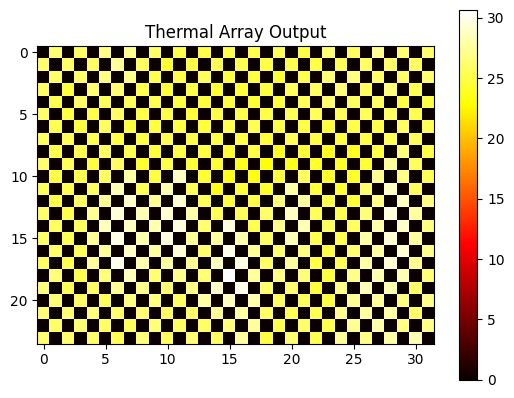

In [28]:
import matplotlib.pyplot as plt

plt.imshow(ira_matrix[0], cmap='hot')
plt.colorbar()
plt.title("Thermal Array Output")
plt.show()

In [22]:
bbox_label = np.array(data['GT_bbox'])
bbox_label.shape

/tmp/ipykernel_9943/2293689882.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  bbox_label = np.array(data['GT_bbox'])


(618,)

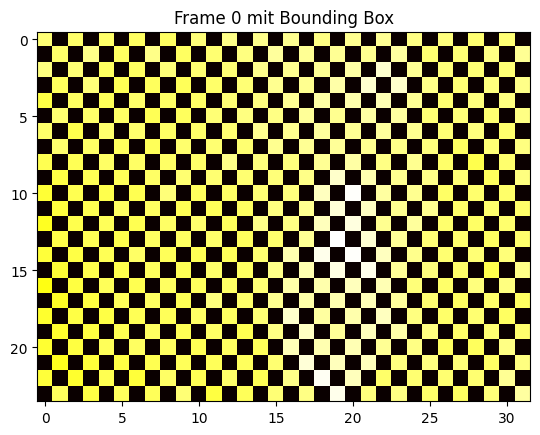

In [18]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

frame_index = 0
image = ira_matrix[frame_index]  # Dein Thermalbild
bboxes = bbox_label[frame_index] # Liste von BBoxen: [[x, y, w, h], ...]

plt.imshow(image, cmap='hot')
ax = plt.gca()

if bbox and bbox[2] > 0 and bbox[3] > 0:
    x, y, w, h = bbox
    rect = patches.Rectangle((x, y), w, h, linewidth=4, edgecolor='red', facecolor='none')
    ax.add_patch(rect)
else:
    print("Keine gültige Bounding Box im Frame.")

plt.title(f"Frame {frame_index} mit Bounding Box")
plt.show()

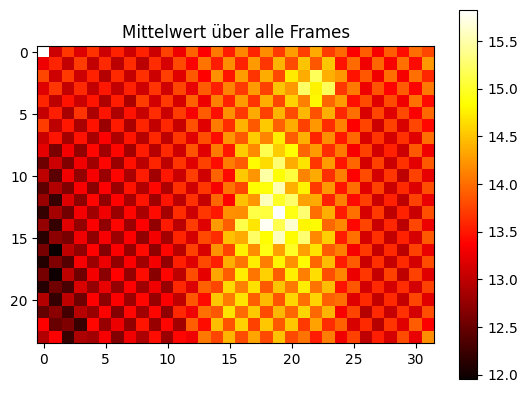

In [15]:
import matplotlib.pyplot as plt

# Zeige einen Querschnitt durch die Zeitachse (z.B. Mittelwert über alle Frames)
mean_image = ira_matrix.mean(axis=0)
plt.imshow(mean_image, cmap='hot')
plt.colorbar()
plt.title("Mittelwert über alle Frames")
plt.show()

In [23]:
for key in data.keys():
    value = data[key]
    try:
        arr = np.array(value)
        print(f"Key: {key} | Shape: {arr.shape}")
    except Exception as e:
        print(f"Key: {key} | Shape: Nicht bestimmbar ({e})")

Key: ira_temperature_matrix | Shape: (618, 24, 32)
Key: ira_ambient_temperature | Shape: (618,)
Key: timestamps | Shape: (618,)
Key: GT_bbox | Shape: (618,)
Key: depth | Shape: (618,)
Key: range | Shape: (618,)


/tmp/ipykernel_12207/1121742015.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.array(value)


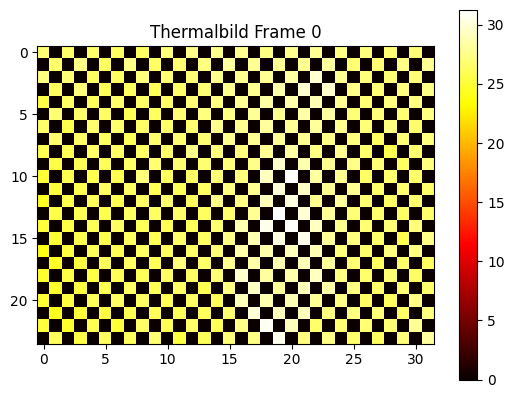

In [26]:
import matplotlib.pyplot as plt

# Plot Thermalbild (erstes Frame)
if 'ira_temperature_matrix' in data:
    ira_matrix = np.array(data['ira_temperature_matrix'])
    plt.imshow(ira_matrix[0], cmap='hot')
    plt.title('Thermalbild Frame 0')
    plt.colorbar()
    plt.show()


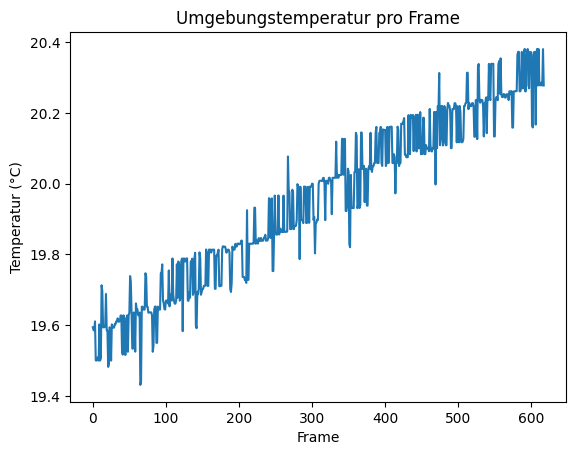

In [25]:
plt.plot(data['ira_ambient_temperature'])
plt.title('Umgebungstemperatur pro Frame')
plt.xlabel('Frame')
plt.ylabel('Temperatur (°C)')
plt.show()

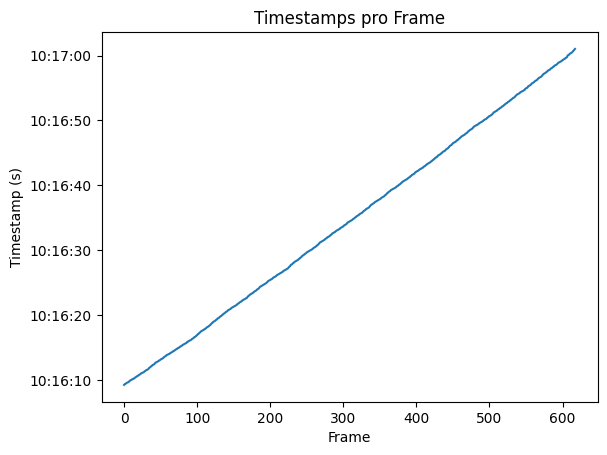

In [27]:
plt.plot(data['timestamps'])
plt.title('Timestamps pro Frame')
plt.xlabel('Frame')
plt.ylabel('Timestamp (s)')
plt.show()


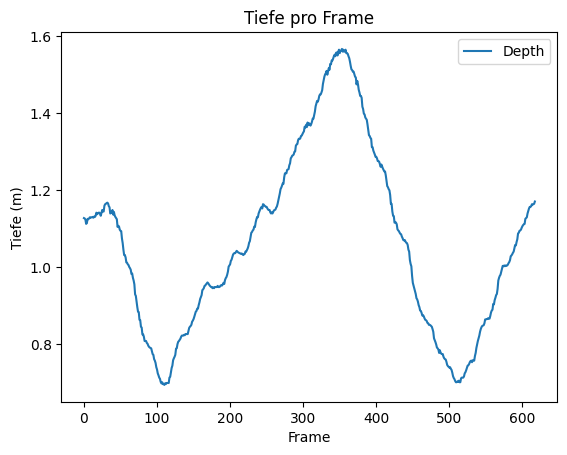

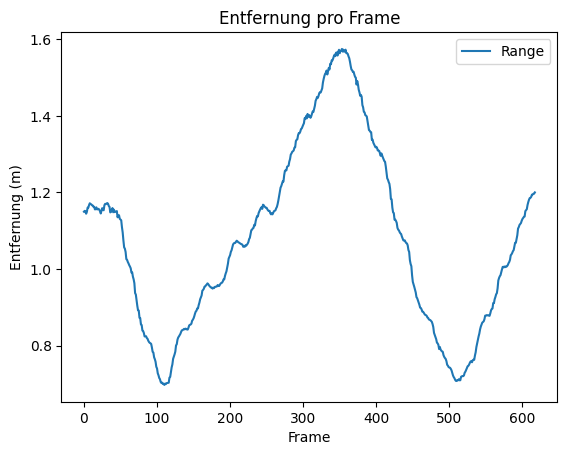

In [29]:
import matplotlib.pyplot as plt

# Extrahiere den ersten Wert pro Frame, falls vorhanden
def flatten_first_value(arr):
    return [v[0] if isinstance(v, (list, np.ndarray)) and len(v) > 0 else np.nan for v in arr]

# Plot depth über Frames
if "depth" in data:
    depth_flat = flatten_first_value(data["depth"])
    plt.plot(depth_flat, label="Depth")
    plt.title("Tiefe pro Frame")
    plt.xlabel("Frame")
    plt.ylabel("Tiefe (m)")
    plt.legend()
    plt.show()

# Plot range über Frames
if "range" in data:
    range_flat = flatten_first_value(data["range"])
    plt.plot(range_flat, label="Range")
    plt.title("Entfernung pro Frame")
    plt.xlabel("Frame")
    plt.ylabel("Entfernung (m)")
    plt.legend()
    plt.show()